In [8]:
import pandas as pd

In [9]:
data = pd.read_csv(r'C:\Users\mahe\Desktop\Task 3\Bank_Personal_Loan_Modelling.csv')

In [10]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<h2>Data Exploration</h2>

In [13]:
data['ZIP Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

In [14]:
data[data['Personal Loan']==1]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4884,38,13,129,92646,3,4.1,3,0,1,0,1,1,1
4927,4928,43,19,121,94720,1,0.7,2,0,1,0,1,1,1
4941,4942,28,4,112,90049,2,1.6,2,0,1,0,0,1,0
4962,4963,46,20,122,90065,3,3.0,3,0,1,0,1,1,1


<h2>Model Building</h2>

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
def naive_bayes(x_train,y_train):
    classifier = GaussianNB()
    classifier.fit(x_train,y_train)
    
    return classifier

In [17]:
def k_nearest_neighbors(x_train,y_train):
    classifier = KNeighborsClassifier(n_neighbors=10)
    classifier.fit(x_train,y_train)
    
    return classifier

In [18]:
def svc(x_train,y_train):
    classifier = SVC(kernel = 'rbf', gamma = 'scale')
    classifier.fit(x_train,y_train)
    
    return classifier

In [19]:
def decision_tree(x_train,y_train):
    classifier = DecisionTreeClassifier(max_depth=6)
    classifier.fit(x_train,y_train)
    
    return classifier

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
X = data.drop(['Personal Loan','ID'],axis = 1)
Y = data['Personal Loan']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [29]:
def build_and_train_classifier(x_train,y_train,classification_fn):
    model = classification_fn(x_train,y_train)
    y_pred = model.predict(x_test)
    
    train_score = model.score(x_train,y_train)
    test_score = accuracy = accuracy_score(y_test,y_pred)
    
    print("Training Score: ",train_score)
    print("Testing Score: ", test_score)

In [30]:
build_and_train_classifier(x_train,y_train,naive_bayes)

Training Score:  0.8895
Testing Score:  0.896


In [31]:
build_and_train_classifier(x_train,y_train,k_nearest_neighbors)

Training Score:  0.91425
Testing Score:  0.884


In [32]:
build_and_train_classifier(x_train,y_train,svc)

Training Score:  0.909
Testing Score:  0.884


In [33]:
build_and_train_classifier(x_train,y_train,decision_tree)

Training Score:  0.99325
Testing Score:  0.979


In [34]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
kn_model = KNeighborsClassifier(n_neighbors=10)
kn_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [36]:
svc_model = SVC(kernel = 'rbf', gamma = 'scale')
svc_model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
dt_model = DecisionTreeClassifier(max_depth=6)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
y_pred_nb = nb_model.predict(x_test)

Populating the interactive namespace from numpy and matplotlib


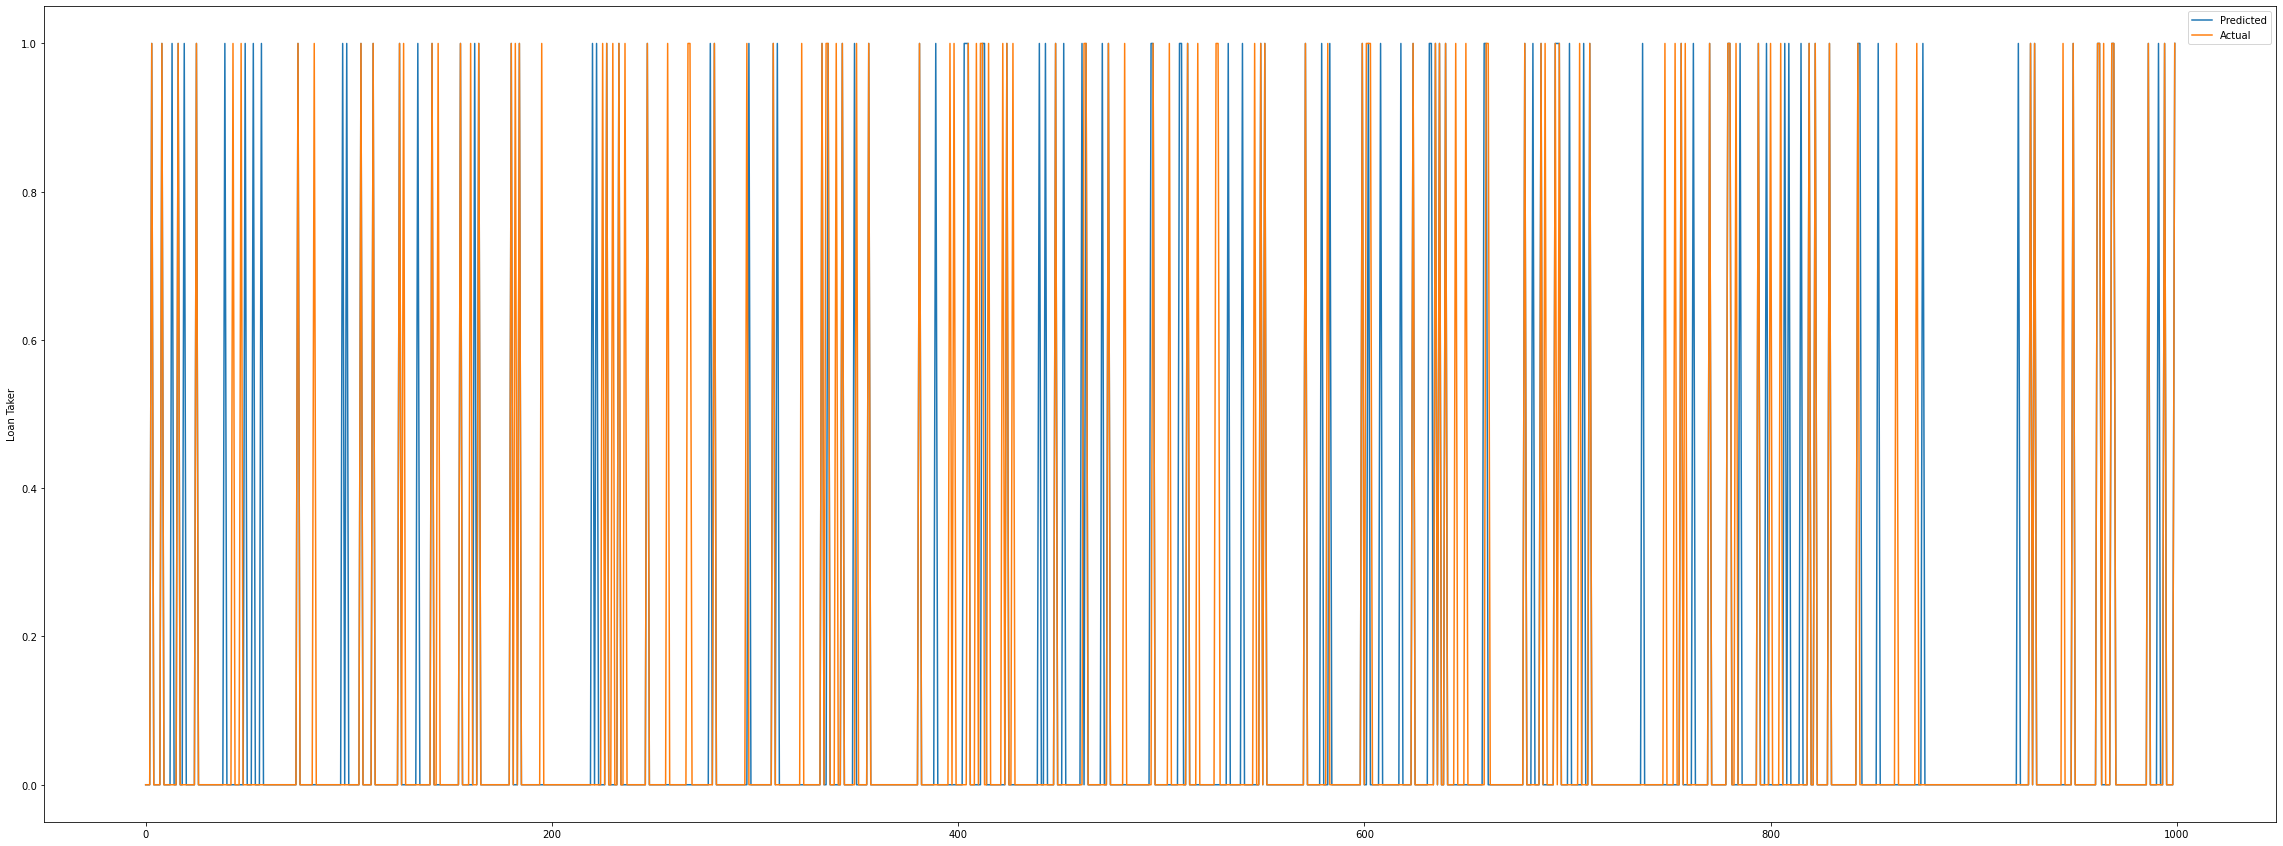

In [41]:
%pylab inline
pylab.rcParams['figure.figsize'] = {15,40}

plt.plot(y_pred_nb,label = 'Predicted')
plt.plot(y_test.values,label = 'Actual')
plt.ylabel('Loan Taker')

plt.legend()
plt.show()

In [42]:
y_pred_dt = dt_model.predict(x_test)

Populating the interactive namespace from numpy and matplotlib


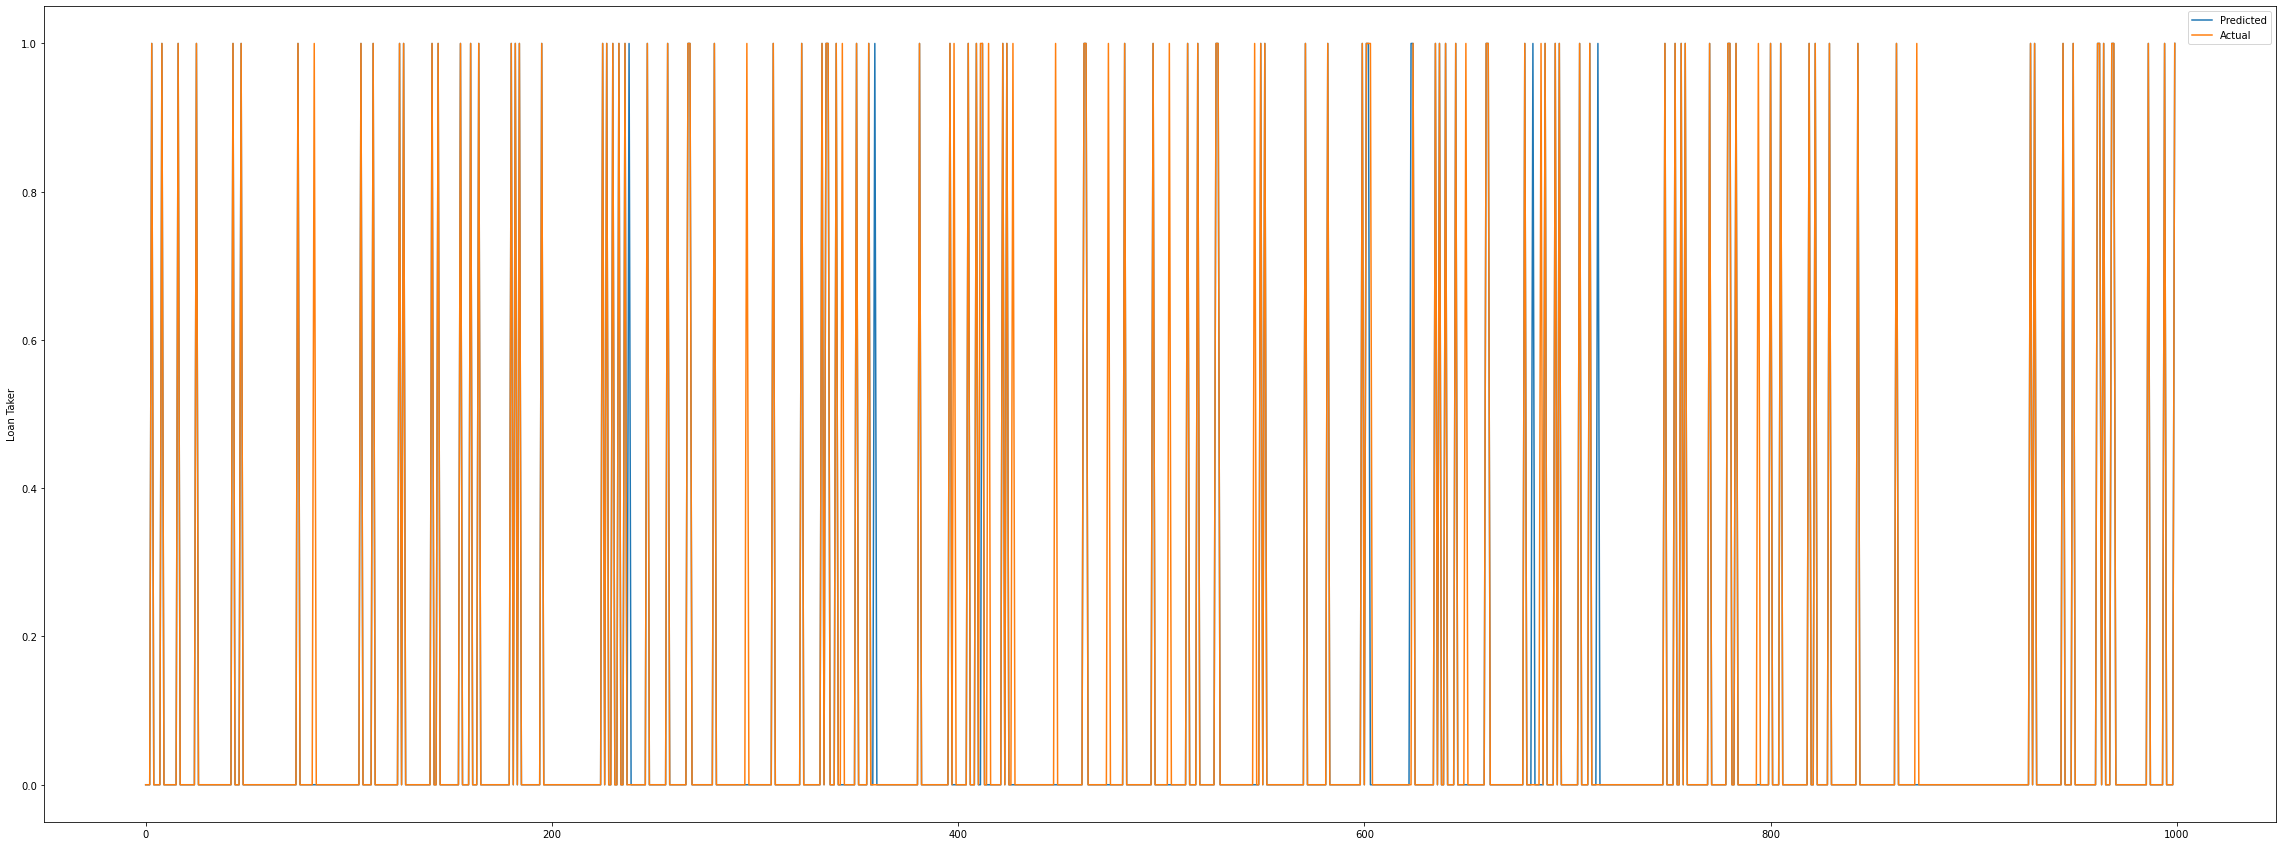

In [43]:
%pylab inline
pylab.rcParams['figure.figsize'] = {15,40}

plt.plot(y_pred_dt,label = 'Predicted')
plt.plot(y_test.values,label = 'Actual')
plt.ylabel('Loan Taker')

plt.legend()
plt.show()

<h4>Since Decision Tree Classifier gives us the best result we will go ahead with it</h4>

In [44]:
data_mod = data.drop(['Personal Loan','ID'],axis = 1)
y_pred_tot = dt_model.predict(data_mod)

In [45]:
train = pd.read_csv(r'C:\Users\mahe\Desktop\Task 3\Bank_Personal_Loan_Modelling.csv')

In [46]:
train.drop(['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard'],axis=1,inplace = True)

In [47]:
train

,ID,Personal Loan
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
4995,4996,0
4996,4997,0
4997,4998,0
4998,4999,0


In [48]:
train['Prediction']=y_pred_tot

In [50]:
train.head(10)

,ID,Personal Loan,Prediction
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0
5,6,0,0
6,7,0,0
7,8,0,0
8,9,0,0
9,10,1,1


In [51]:
train.to_csv(r'C:\Users\mahe\Desktop\Task 3\test_withpred.csv',index= False)